## Time series forecasing in Tensorflow

In [7]:
import pandas as pd
df = pd.read_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD.csv")

df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
1,2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2,2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
3,2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0.0
4,2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0.0


## Các thao tác phân tích, xử lý và trực quan dữ liệu 

In [8]:
# Đổi cột Date sang Index
df.Date = pd.to_datetime(df.Date, dayfirst = False) 
df.set_index("Date", inplace = True)

df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0.0
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4903 entries, 2004-01-01 to 2022-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4874 non-null   float64
 1   High       4874 non-null   float64
 2   Low        4874 non-null   float64
 3   Close      4874 non-null   float64
 4   Adj Close  4874 non-null   float64
 5   Volume     4874 non-null   float64
dtypes: float64(6)
memory usage: 268.1 KB


In [30]:
eurusd_prices = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

eurusd_prices.head(5)

,Price
Date,
2004-01-01,1.259002
2004-01-02,1.258194
2004-01-05,1.263903
2004-01-06,1.268907
2004-01-07,1.272394


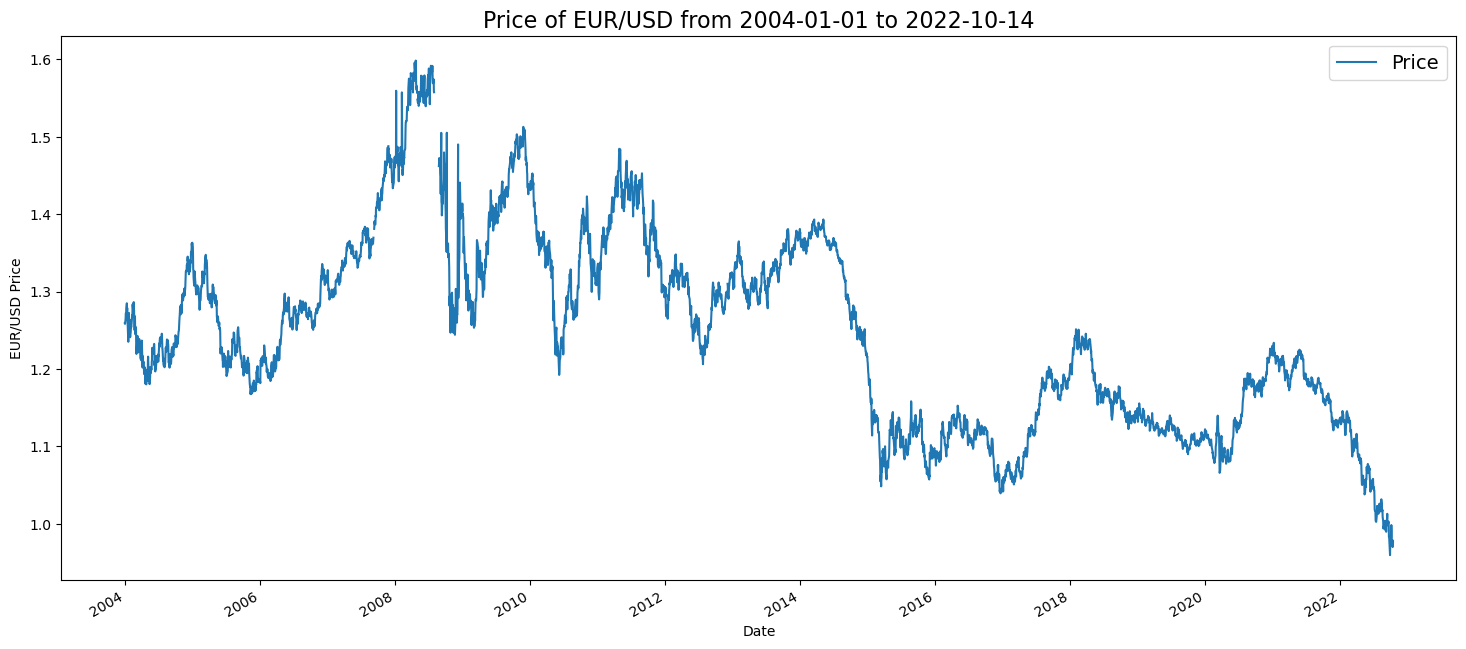

In [31]:
# Trực quan dữ liệu EUR/USD bằng đồ thị đường
import matplotlib.pyplot as plt
eurusd_prices.plot(figsize=(18,8))
plt.ylabel("EUR/USD Price")
plt.title("Price of EUR/USD from 2004-01-01 to 2022-10-14", fontsize=16)
plt.legend(fontsize=14)

In [35]:
from datetime import date
d0 = date(2022, 10, 14)
d1 = date(2004, 1, 1)
delta = abs(d0 - d1)

print("Số ngày từ 1/1/2004 -> 14/10/2022     : " + str(delta.days) + " ngày")

print("")

print("Dữ liệu có trong dữ liệu hiện tại gồm : " + str(len(df)) + " ngày (Đã bao gồm giá trị Null)")

print("")

print("Dữ liệu chứa giá trị Null là          : " + str(df['Close'].isnull().sum()) + " ngày")

print("")
print("Dữ liệu thiếu                         : " + str(delta.days - len(df)) + " ngày")

Số ngày từ 1/1/2004 -> 14/10/2022     : 6861 ngày

Dữ liệu có trong dữ liệu hiện tại gồm : 4903 ngày (Đã bao gồm giá trị Null)

Dữ liệu chứa giá trị Null là          : 29 ngày

Dữ liệu thiếu                         : 1958 ngày
